# INDIAN PREMIUM LEAGUE (IPL)-Predictions with Bayesian Model.

## Introduction

# Exploring the Thrills of the Indian Premier League (IPL)

Welcome to our exciting journey through the data-driven world of the Indian Premier League (IPL), one of the most exhilarating and competitive cricket leagues globally. Launched in 2008, the IPL has not only revolutionized T20 cricket but has also captivated the hearts of millions of fans worldwide.

![IPL Trophy](https://images.odishatv.in/uploadimage/library/16_9/16_9_5/IPL_2023_1676637957.jpg)

## What is IPL?

The IPL is a professional Twenty20 cricket league in India contested during March or April and May of every year by teams representing eight cities or states of India. The league has seen participation from top international players, making it a melting pot of cricketing talent.

## Why is IPL so Popular?

- **Star-Studded Teams:** Each team features a mix of international cricket stars and emerging local talent.
- **Exciting Format:** Matches are played in the T20 format, which is known for its fast-paced and high-scoring nature, ensuring thrilling encounters that keep fans on the edge of their seats.
- **Massive Fan Following:** The IPL is not just a cricket league; it's a festival that brings together people from all walks of life, celebrated with great pomp and show across the country.

## Interesting Facts About the IPL:

- **Global Audience:** The IPL 2024 opening match alone attracted a viewership of approximately 168 million across TV and digital platforms. 
- **Record-Breaking Broadcasts:** In 2017, the IPL became the first sporting event in the world to be broadcast live on YouTube.

In this notebook, we'll dive into the data of past IPL seasons to uncover patterns and insights that define this dynamic tournament. Whether you're a die-hard cricket fan or new to the sport, there's something here for everyone!

## Data Import and Setup:
Libraries such as NumPy, pandas, matplotlib, seaborn, pymc3, and arviz are imported, for usage in data manipulation, statistical modeling, and visualization techniques.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import pymc3 as pm
import arviz as az
sns.set_context('notebook')
np.random.seed(0) # to keep it reproducible

RANDOM_SEED = 20090425

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Ball by Ball(deliveries) Dataset
#### Source: https://data.world/vijayabhaskar/ipl-all-match-complete-data

In [3]:
ipl_data = pd.read_csv("data/deliveries.csv")

In [4]:
ipl_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [5]:
ipl_data.shape

(136598, 21)

## Match level Dataset
#### Source: https://data.world/datum-world/ipl-dataset/workspace/file?filename=IPL+Matches+2008-2020.csv

In [6]:
IPL_data_match = pd.read_csv("data/matches.csv")

In [7]:
IPL_data_match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [8]:
IPL_data_match.shape

(816, 17)

## Preliminary Data Exploration:
Basic commands to display the DataFrame, its columns, and possibly some initial exploration like the structure and summary statistics of the data.

Quick overview of the DataFrame's structure and content

In [9]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136598 entries, 0 to 136597
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          136598 non-null  int64 
 1   inning            136598 non-null  int64 
 2   batting_team      136598 non-null  object
 3   bowling_team      136598 non-null  object
 4   over              136598 non-null  int64 
 5   ball              136598 non-null  int64 
 6   batsman           136598 non-null  object
 7   non_striker       136598 non-null  object
 8   bowler            136598 non-null  object
 9   is_super_over     136598 non-null  int64 
 10  wide_runs         136598 non-null  int64 
 11  bye_runs          136598 non-null  int64 
 12  legbye_runs       136598 non-null  int64 
 13  noball_runs       136598 non-null  int64 
 14  penalty_runs      136598 non-null  int64 
 15  batsman_runs      136598 non-null  int64 
 16  extra_runs        136598 non-null  int

In [10]:
ipl_data.isnull().sum(axis=0)

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    129871
dismissal_kind      129871
fielder             131727
dtype: int64

In [11]:
ipl_data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000
mean,288.564679,1.482738,10.144585,3.617125,0.000498,0.037782,0.004978,0.022372,0.004480,0.000073,1.215311,0.069686,1.284997
std,165.929865,0.501575,5.673901,1.808200,0.022306,0.260535,0.115512,0.201309,0.074062,0.019132,1.589654,0.353357,1.579014
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,145.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,289.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,432.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,577.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [12]:
IPL_data_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [13]:
IPL_data_match.isnull().sum(axis=0)

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [14]:
IPL_data_match.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [15]:
IPL_data_match.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                  'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                  'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant', 'Delhi Capitals']
                 ,['MI','KKR','RCB','SRH','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS','DC2'],inplace=True)

### Calculate the total number of matches played by each team

In [16]:
Totalmatches=IPL_data_match['team1'].value_counts()+IPL_data_match['team2'].value_counts()
Totalmatches_df = pd.DataFrame({'Team': Totalmatches.index, 'totalMatches': Totalmatches.values})
Totalmatches_df

,Team,totalMatches
0,CSK,178
1,DC2,33
2,DD,161
3,GL,30
4,KKR,192
5,KTK,14
6,KXIP,190
7,MI,203
8,PW,46
9,RCB,195


### Calculate the total number of wins each team has secured in the IPL

In [17]:
wins = IPL_data_match['winner'].value_counts()
wins_df = pd.DataFrame({'Team': wins.index, 'Wins': wins.values})
wins_df

,Team,Wins
0,MI,120
1,CSK,106
2,KKR,99
3,SRH,95
4,RCB,91
5,KXIP,88
6,RR,81
7,DD,67
8,DC2,19
9,RPS,15


### Merging total matches and total wins data for each team

In [19]:
result = pd.merge(Totalmatches_df, wins_df, on='Team', how='inner')
result

,Team,totalMatches,Wins
0,CSK,178,106
1,DC2,33,19
2,DD,161,67
3,GL,30,13
4,KKR,192,99
5,KTK,14,6
6,KXIP,190,88
7,MI,203,120
8,PW,46,12
9,RCB,195,91


## Exploratory Data Analysis:

#### This code snippet creates a visualization using the Seaborn library to show how often each team has won the toss in the IPL dataset.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'RCB'),
  Text(1, 0, 'CSK'),
  Text(2, 0, 'RR'),
  Text(3, 0, 'MI'),
  Text(4, 0, 'SRH'),
  Text(5, 0, 'KXIP'),
  Text(6, 0, 'KKR'),
  Text(7, 0, 'DD'),
  Text(8, 0, 'KTK'),
  Text(9, 0, 'PW'),
  Text(10, 0, 'GL'),
  Text(11, 0, 'RPS'),
  Text(12, 0, 'DC2')])

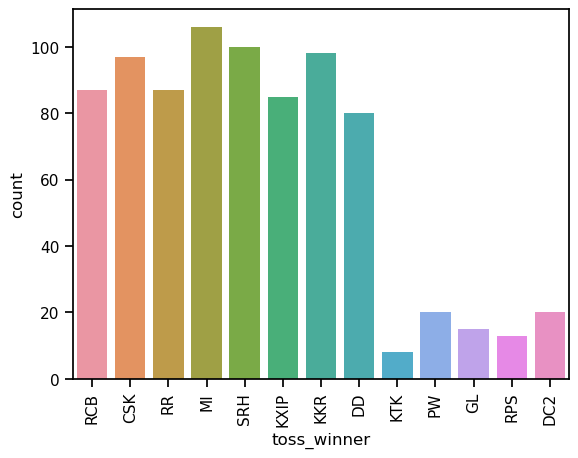

In [20]:
sns.countplot( x = 'toss_winner', data = IPL_data_match)
plt.xticks(rotation='vertical')

### Visualizing Win Rates by Team

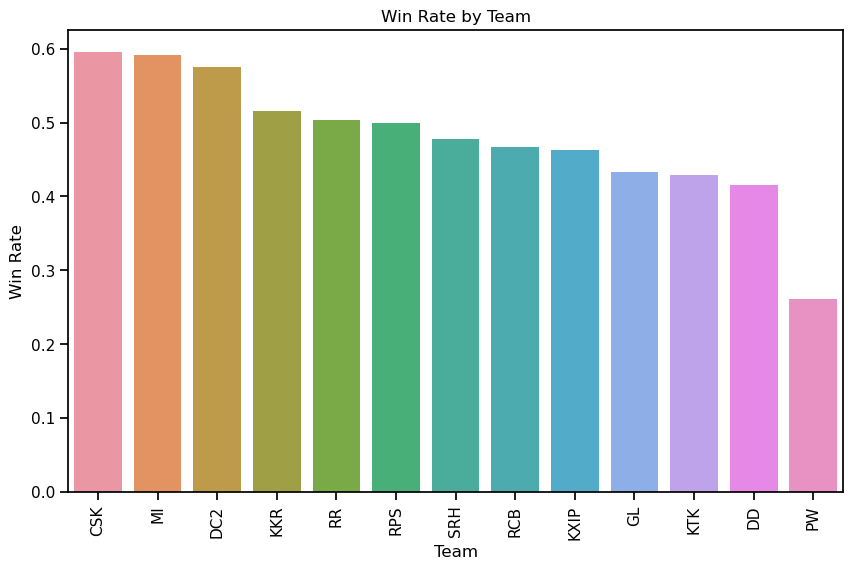

In [21]:
result['Win Rate'] = result['Wins'] / result['totalMatches']

# Plot win rates by team
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Win Rate', data=result.sort_values(by='Win Rate', ascending=False))
plt.xticks(rotation=90)
plt.title('Win Rate by Team')
plt.show()

### Top 10 MVPs and Their Win Contribution by Team

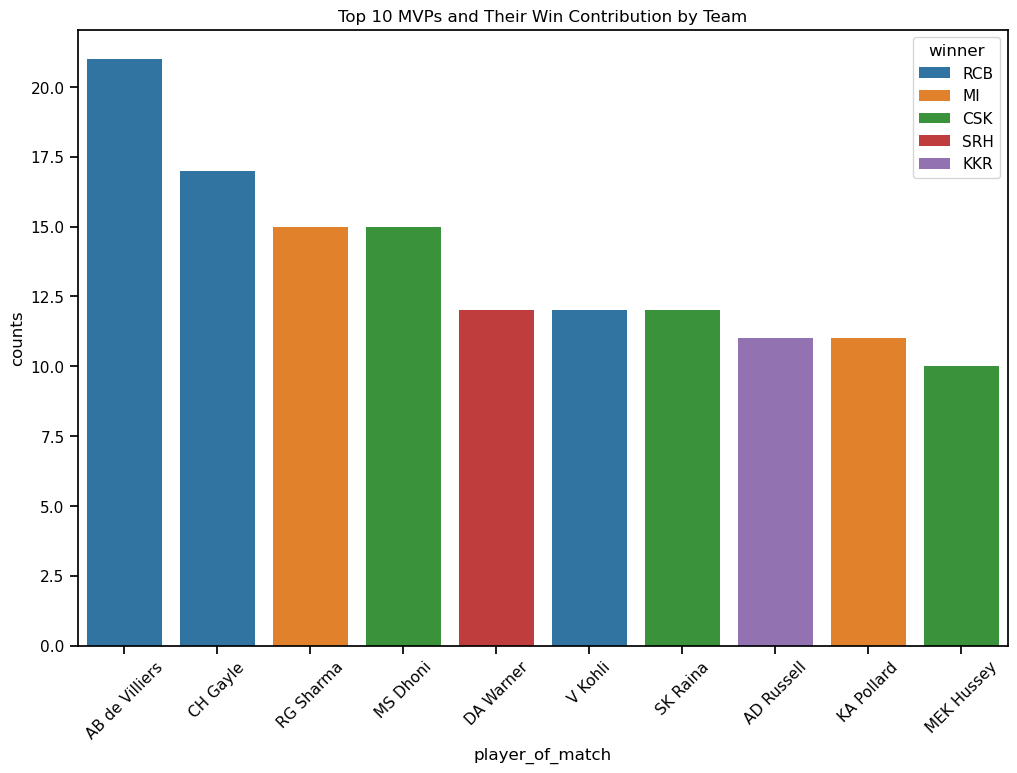

In [22]:
# Group data by 'player_of_match' and 'winner' to see MVPs influence on wins
mvp_counts = IPL_data_match[IPL_data_match['player_of_match'].notna()].groupby(['winner', 'player_of_match']).size().reset_index(name='counts')
top_mvp = mvp_counts.sort_values(by='counts', ascending=False).head(10)

# Plot MVP counts for top players
plt.figure(figsize=(12, 8))
sns.barplot(x='player_of_match', y='counts', hue='winner', data=top_mvp, dodge=False)
plt.title('Top 10 MVPs and Their Win Contribution by Team')
plt.xticks(rotation=45)
plt.show()

### Matches Won by Toss Winners

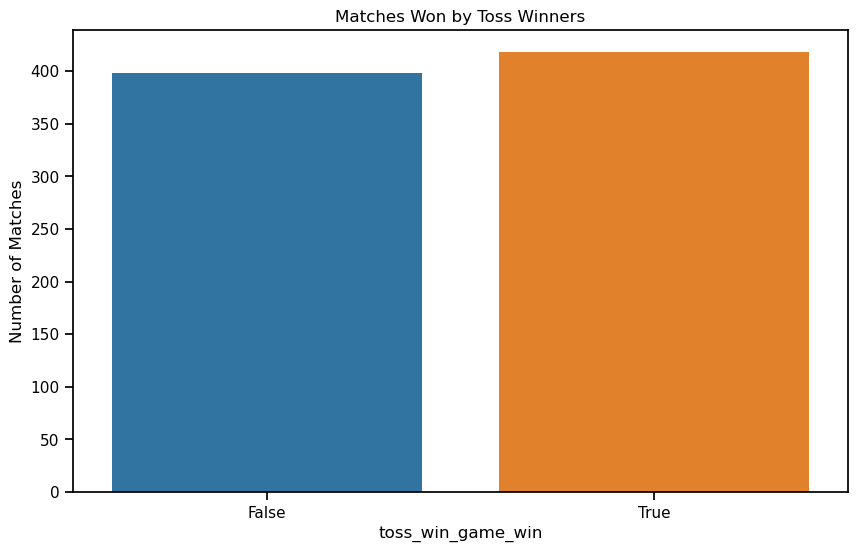

In [23]:
IPL_data_match['toss_win_game_win'] = (IPL_data_match['toss_winner'] == IPL_data_match['winner'])
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_win_game_win', data=IPL_data_match)
plt.title('Matches Won by Toss Winners')
plt.ylabel('Number of Matches')
plt.show()

### Win Percentage by Venue

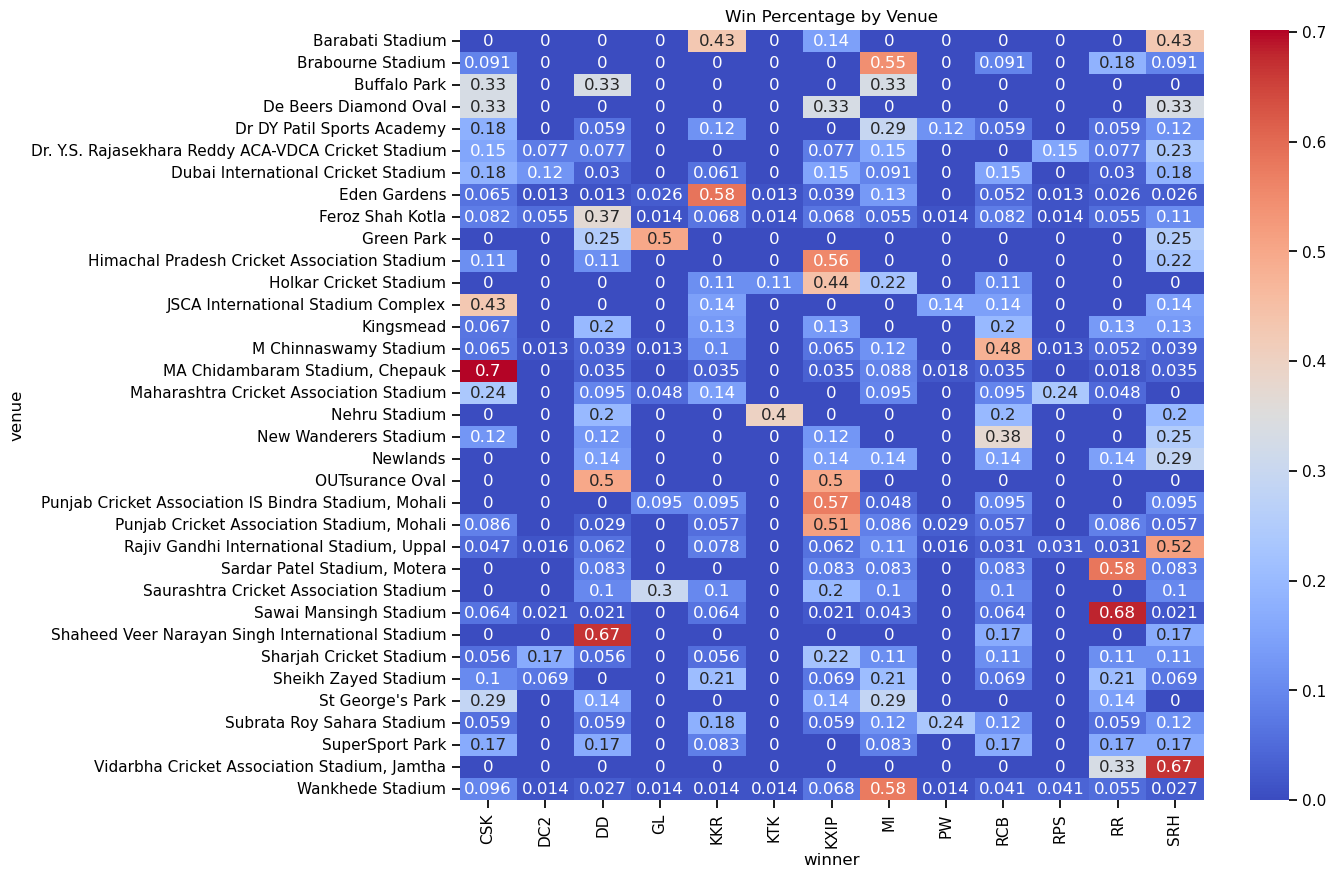

In [26]:
# Cleaning stadium names
IPL_data_match['venue'] = IPL_data_match['venue'].replace({'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium'})


# Calculate win counts by venue
venue_wins = IPL_data_match.groupby(['venue', 'winner']).size().unstack(fill_value=0)

# Calculate win percentages
venue_win_percent = venue_wins.div(venue_wins.sum(axis=1), axis=0)

plt.figure(figsize=(12, 10))
sns.heatmap(venue_win_percent, cmap='coolwarm', annot=True)
plt.title('Win Percentage by Venue')
plt.xticks(rotation=90)
plt.show()

# Feature Engineering

## Batsman and Bowler Impact Score

![image.png](https://static.toiimg.com/thumb/msid-99815458,width-1280,height-720,resizemode-4/99815458.jpg)
#### Methodology to calculate batsmen and bowler impact scores.
Batting Performance Impact:

    - Batting Strike Rate Benchmark : 130 runs per 100 balls
    - Batting Average Benchmark : 30 runs per dismissal
    - Performance Benchmark : 130 (SR) + 30 (Average) = 160 
    - Quality = (Strike Rate + Average) / Performance Benchmark 
    - Frequency = Balls Faced / Match
    - Player Impact = Quality x Frequency
    - 100Factor = 100s scored / matches played
    - 50 Factor = 50s scored / matches played

Batting Impact  = Player Impact + (Player Impact x 100Factor) + (Player Impact x 50Factor/2)

Bowling Performance Impact:

    - Economy Benchmark : 8 runs an over
    - Strike Rate Benchmark : 12 (2 wickets in 4 overs)
    - Performance Benchmark : 8 (Eco) x 12 (SR) = 96 [rounded off to 100 for the sake of simplicity]
    - Quality = Performance Benchmark / (Economy x Strike Rate)
    - Frequency = Balls Bowled / Match
    - Player Impact = Quality x Frequency 
    - 4WFactor = 4 wickets in an innings / matches played
    - 5WFactor = 5 wickets in an innings / matches played

Bowling Impact = Player Impact + (Player Impact x 5WF) + (Player Impact x 4WF/2) 

_Ref: https://www.krick3r.com/2016/02/t20-performance-impact-method.html_



### Calculate innings metrics for each batsmen

In [29]:
batsman_grouped = ipl_data.groupby(['batsman', 'match_id']).agg(
    runs=pd.NamedAgg(column='batsman_runs', aggfunc='sum'),
    balls=pd.NamedAgg(column='ball', aggfunc='count'),
    hundreds=pd.NamedAgg(column='batsman_runs', aggfunc=lambda x: (x.sum() >= 100)),
    fifties=pd.NamedAgg(column='batsman_runs', aggfunc=lambda x: (x.sum() >= 50) and (x.sum() < 100))
)

batsman_grouped

runs  balls  hundreds  fifties
batsman        match_id                                
A Ashish Reddy 287         10     10     False    False
               293          3      3     False    False
               300          8      8     False    False
               314         10      4     False    False
               317          4      5     False    False
...                       ...    ...       ...      ...
Z Khan         403          0      2     False    False
               411          7      3     False    False
               418          1      2     False    False
               519          4      9     False    False
               564          2      4     False    False

[8617 rows x 4 columns]

### Calculate match-level aggregattion for each batsmen

In [30]:
batsman_matches = batsman_grouped.groupby('batsman').agg(
    total_runs=pd.NamedAgg(column='runs', aggfunc='sum'),
    total_balls=pd.NamedAgg(column='balls', aggfunc='sum'),
    matches=pd.NamedAgg(column='runs', aggfunc='size'),
    hundreds_count=pd.NamedAgg(column='hundreds', aggfunc='sum'),
    fifties_count=pd.NamedAgg(column='fifties', aggfunc='sum')
)
batsman_matches

,total_runs,total_balls,matches,hundreds_count,fifties_count
batsman,,,,,
A Ashish Reddy,280,196,23,0,0
A Chandila,4,7,2,0,0
A Chopra,53,75,6,0,0
A Flintoff,62,57,3,0,0
A Kumble,35,49,15,0,0
...,...,...,...,...,...
YV Takawale,192,183,10,0,0
Yashpal Singh,47,67,4,0,0
Younis Khan,3,7,1,0,0


In [31]:
# Calculate batting averages and strike rates
batsman_matches['average'] = batsman_matches['total_runs'] / batsman_matches['matches']  # Simplified average per match
batsman_matches['strike_rate'] = (batsman_matches['total_runs'] / batsman_matches['total_balls']) * 100
batsman_matches['frequency'] = batsman_matches['total_balls'] / batsman_matches['matches']
batsman_matches['quality'] = (batsman_matches['strike_rate'] + batsman_matches['average']) / 160

# Calculate Player Impact, 100s and 50s factor
batsman_matches['player_impact'] = batsman_matches['quality'] * batsman_matches['frequency']
batsman_matches['100_factor'] = batsman_matches['hundreds_count'] / batsman_matches['matches']
batsman_matches['50_factor'] = batsman_matches['fifties_count'] / batsman_matches['matches']

# Calculate final Batting Impact
batsman_matches['batting_impact'] = batsman_matches['player_impact'] + \
                                    (batsman_matches['player_impact'] * batsman_matches['100_factor']) + \
                                    (batsman_matches['player_impact'] * batsman_matches['50_factor'] / 2)


# print(batsman_matches[['player_impact', '100_factor', '50_factor', 'batting_impact']])


### Calculate innings metrics for bowlers

In [35]:
bowler_grouped = ipl_data.groupby(['bowler', 'match_id']).agg(
    runs_conceded=pd.NamedAgg(column='total_runs', aggfunc='sum'),
    balls=pd.NamedAgg(column='ball', aggfunc='count'),
    wickets=pd.NamedAgg(column='dismissal_kind', aggfunc=lambda x: x.notna().sum()),  # assuming all kinds of dismissals
    four_wickets=pd.NamedAgg(column='dismissal_kind', aggfunc=lambda x: (x.notna().sum() >= 4) and (x.notna().sum() < 5)),
    five_wickets=pd.NamedAgg(column='dismissal_kind', aggfunc=lambda x: (x.notna().sum() >= 5))
)

# Calculate match-level aggregates
bowler_matches = bowler_grouped.groupby('bowler').agg(
    total_runs_conceded=pd.NamedAgg(column='runs_conceded', aggfunc='sum'),
    total_balls=pd.NamedAgg(column='balls', aggfunc='sum'),
    matches=pd.NamedAgg(column='runs_conceded', aggfunc='size'),
    wickets=pd.NamedAgg(column='wickets', aggfunc=lambda x: x.notna().sum()),
    four_wicket_hauls=pd.NamedAgg(column='four_wickets', aggfunc='sum'),
    five_wicket_hauls=pd.NamedAgg(column='five_wickets', aggfunc='sum')
)

# Calculate bowling strike rate and economy
bowler_matches['economy'] = (bowler_matches['total_runs_conceded'] / bowler_matches['total_balls']) * 6  # Runs per over

bowler_grouped.head(100)

runs_conceded  balls  wickets  four_wickets  \
bowler         match_id                                                
A Ashish Reddy 272                  29     12        0         False   
               282                  32     24        2         False   
               287                  11     14        1         False   
               289                  32     19        1         False   
               293                  16     13        1         False   
...                                ...    ...      ...           ...   
A Mishra       121                  34     24        2         False   
               124                  44     25        1         False   
               126                  25     21        1         False   
               130                  13     19        1         False   
               138                  27     24        2         False   

                         five_wickets  
bowler         match_id                
A Ashish Reddy 272              False  
               282              False  
               287              False  
               289              False  
               293              False  
...                               ...  
A Mishra       121              False  
               124              False  
               126              False  
               130              False  
               138              False  

[100 rows x 5 columns]

In [37]:
bowler_matches.iloc[270:300]

,total_runs_conceded,total_balls,matches,wickets,four_wicket_hauls,five_wicket_hauls,economy
bowler,,,,,,,
SD Chitnis,62,38,2,2,0,0,9.789474
SE Bond,225,191,8,8,0,0,7.068063
SJ Srivastava,444,306,14,14,0,0,8.705882
SK Raina,1031,852,62,62,0,0,7.260563
SK Trivedi,1944,1557,75,75,4,0,7.491329
SK Warne,1465,1223,54,54,1,0,7.187244
SL Malinga,2646,2407,98,98,8,1,6.595762
SM Boland,56,43,2,2,0,0,7.813953
SM Harwood,74,67,3,3,0,0,6.626866


In [105]:
bowler_matches['strike_rate'] = bowler_matches['total_balls'] / bowler_matches['wickets']  # Balls per wicket
bowler_matches['quality'] = 100 / (bowler_matches['economy'] * bowler_matches['strike_rate']) # Simplified quality metric
bowler_matches['frequency'] = bowler_matches['total_balls'] / bowler_matches['matches'] # Balls bowled per match
bowler_matches['player_impact'] = bowler_matches['quality'] * bowler_matches['frequency']   # Player Impact per match
bowler_matches['4w_factor'] = bowler_matches['four_wicket_hauls'] / bowler_matches['matches'] # 4-wicket haul factor
bowler_matches['5w_factor'] = bowler_matches['five_wicket_hauls'] / bowler_matches['matches'] # 5-wicket haul factor

# Calculate final Bowling Impact
bowler_matches['bowling_impact'] = bowler_matches['player_impact'] + \
                                   (bowler_matches['player_impact'] * bowler_matches['5w_factor']) + \
                                   (bowler_matches['player_impact'] * bowler_matches['4w_factor'] / 2) # 4-wicket hauls are half as valuable as 5-wicket hauls



### Consolidate bowling impact scores for each bowler

In [106]:
bowling_impact = bowler_matches[['bowling_impact']]
bowling_impact

,bowling_impact
bowler,
A Ashish Reddy,11.250000
A Chandila,16.581633
A Flintoff,10.377358
A Kumble,16.118982
A Mishra,14.257058
...,...
YA Abdulla,12.978661
YK Pathan,13.792271
YS Chahal,12.800717


### Consolidate batting impact scores for each batsmen

In [107]:
batting_impact = batsman_matches[['batting_impact']]
batting_impact

,batting_impact
batsman,
A Ashish Reddy,8.257089
A Chandila,1.293750
A Chopra,6.210938
A Flintoff,15.370833
A Kumble,1.505972
...,...
YV Takawale,14.196000
Yashpal Singh,8.573828
Younis Khan,2.006250


### Aggregating match and innings metrics and data

In [108]:
# Aggregate data for each match for batting including team name
match_batting = ipl_data.groupby(['match_id', 'inning', 'batting_team']).agg(
    total_runs=pd.NamedAgg(column='total_runs', aggfunc='sum'),
    highest_score=pd.NamedAgg(column='batsman_runs', aggfunc='max'),
    total_fours=pd.NamedAgg(column='batsman_runs', aggfunc=lambda x: (x==4).sum()),
    total_sixes=pd.NamedAgg(column='batsman_runs', aggfunc=lambda x: (x==6).sum())
)

# Aggregate data for each match for bowling including team name
match_bowling = ipl_data.groupby(['match_id', 'inning', 'bowling_team']).agg(
    total_wickets=pd.NamedAgg(column='dismissal_kind', aggfunc=lambda x: x.notna().sum()),
    # best_bowling=pd.NamedAgg(column='player_dismissed', aggfunc='count')
)

match_batting_reset = match_batting.reset_index()
match_bowling_reset = match_bowling.reset_index()

match_summary = pd.merge(match_batting_reset, match_bowling_reset, on=['match_id', 'inning'], suffixes=('_bat', '_bowl'))


In [110]:
match_summary.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                  'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                  'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                 ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [112]:
# Group by match_id and inning to list batters
batters_grouped = ipl_data.groupby(['match_id', 'inning']).agg({
    'batsman': lambda x: list(set(x))  # Use set to avoid duplicates, then convert to list
}).rename(columns={'batsman': 'batters'})

# Group by match_id and inning to list bowlers
bowlers_grouped = ipl_data.groupby(['match_id', 'inning']).agg({
    'bowler': lambda x: list(set(x))  # Use set to avoid duplicates, then convert to list
}).rename(columns={'bowler': 'bowlers'})

# Reset index to facilitate merging
batters_grouped = batters_grouped.reset_index()
bowlers_grouped = bowlers_grouped.reset_index()

# Merge with match_summary
match_summary = pd.merge(match_summary, batters_grouped, on=['match_id', 'inning'], how='left')
match_summary = pd.merge(match_summary, bowlers_grouped, on=['match_id', 'inning'], how='left')


In [113]:
match_summary

,match_id,inning,batting_team,total_runs,highest_score,total_fours,total_sixes,bowling_team,total_wickets,batters,bowlers
0,1,1,KKR,222,6,15,14,RCB,3,"[DJ Hussey, RT Ponting, BB McCullum, SC Gangul...","[SB Joshi, P Kumar, CL White, JH Kallis, Z Kha..."
1,1,2,RCB,82,6,3,3,KKR,10,"[SB Joshi, P Kumar, V Kohli, CL White, JH Kall...","[AB Dinda, SC Ganguly, I Sharma, LR Shukla, AB..."
2,2,1,CSK,240,6,20,16,KXIP,5,"[MEK Hussey, SK Raina, JDP Oram, ML Hayden, PA...","[JR Hopes, IK Pathan, PP Chawla, S Sreesanth, ..."
3,2,2,KXIP,207,6,18,9,CSK,4,"[JR Hopes, SM Katich, KC Sangakkara, IK Pathan...","[P Amarnath, MS Gony, JDP Oram, Joginder Sharm..."
4,3,1,RR,129,6,14,3,DD,8,"[SK Warne, DS Lehmann, T Kohli, YK Pathan, M R...","[R Bhatia, DL Vettori, MF Maharoof, B Geeves, ..."
...,...,...,...,...,...,...,...,...,...,...,...
1159,575,2,KKR,140,6,8,3,SRH,8,"[R Sathish, C Munro, YK Pathan, SA Yadav, RV U...","[BB Sran, B Kumar, BCJ Cutting, DJ Hooda, Must..."
1160,576,1,GL,162,6,22,3,SRH,7,"[ER Dwivedi, BB McCullum, AJ Finch, DR Smith, ...","[BB Sran, B Kumar, BCJ Cutting, TA Boult, Bipu..."
1161,576,2,SRH,163,6,15,7,GL,6,"[S Dhawan, NV Ojha, BCJ Cutting, DJ Hooda, Bip...","[P Kumar, DR Smith, SK Raina, DS Kulkarni, S K..."
1162,577,1,SRH,208,6,20,10,RCB,7,"[S Dhawan, B Kumar, NV Ojha, BCJ Cutting, DJ H...","[Iqbal Abdulla, CJ Jordan, YS Chahal, CH Gayle..."


### Bowler metrics correlation matrix

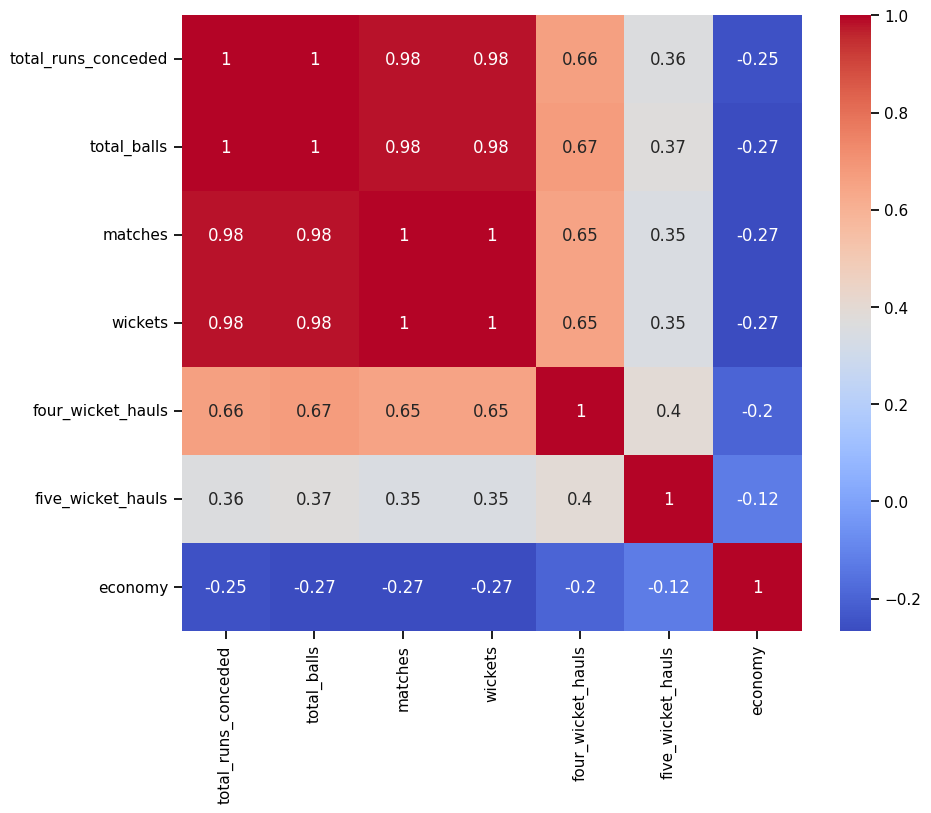

In [58]:
correlation_matrix = bowler_matches.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()


### Infering the correlation matrix:

- Total Runs and Total Balls: Near-perfect correlation, indicating more balls bowled leads to more runs conceded.

- Wickets and Matches:Strong positive correlation, showing that playing more matches often results in more wickets taken.

- Wickets and Total Balls: Very strong correlation, suggesting more deliveries bowled increases wicket chances.

- Four-Wicket Hauls and Wickets: Moderate positive correlation, indicating frequent wicket-takers are likely to have four-wicket hauls.

- Economy and Other Metrics: Negative correlation, albeit weaker, suggesting that a lower economy rate isn't solely dependent on bowling more balls or playing more matches.

### Pair Plot Analysis


C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


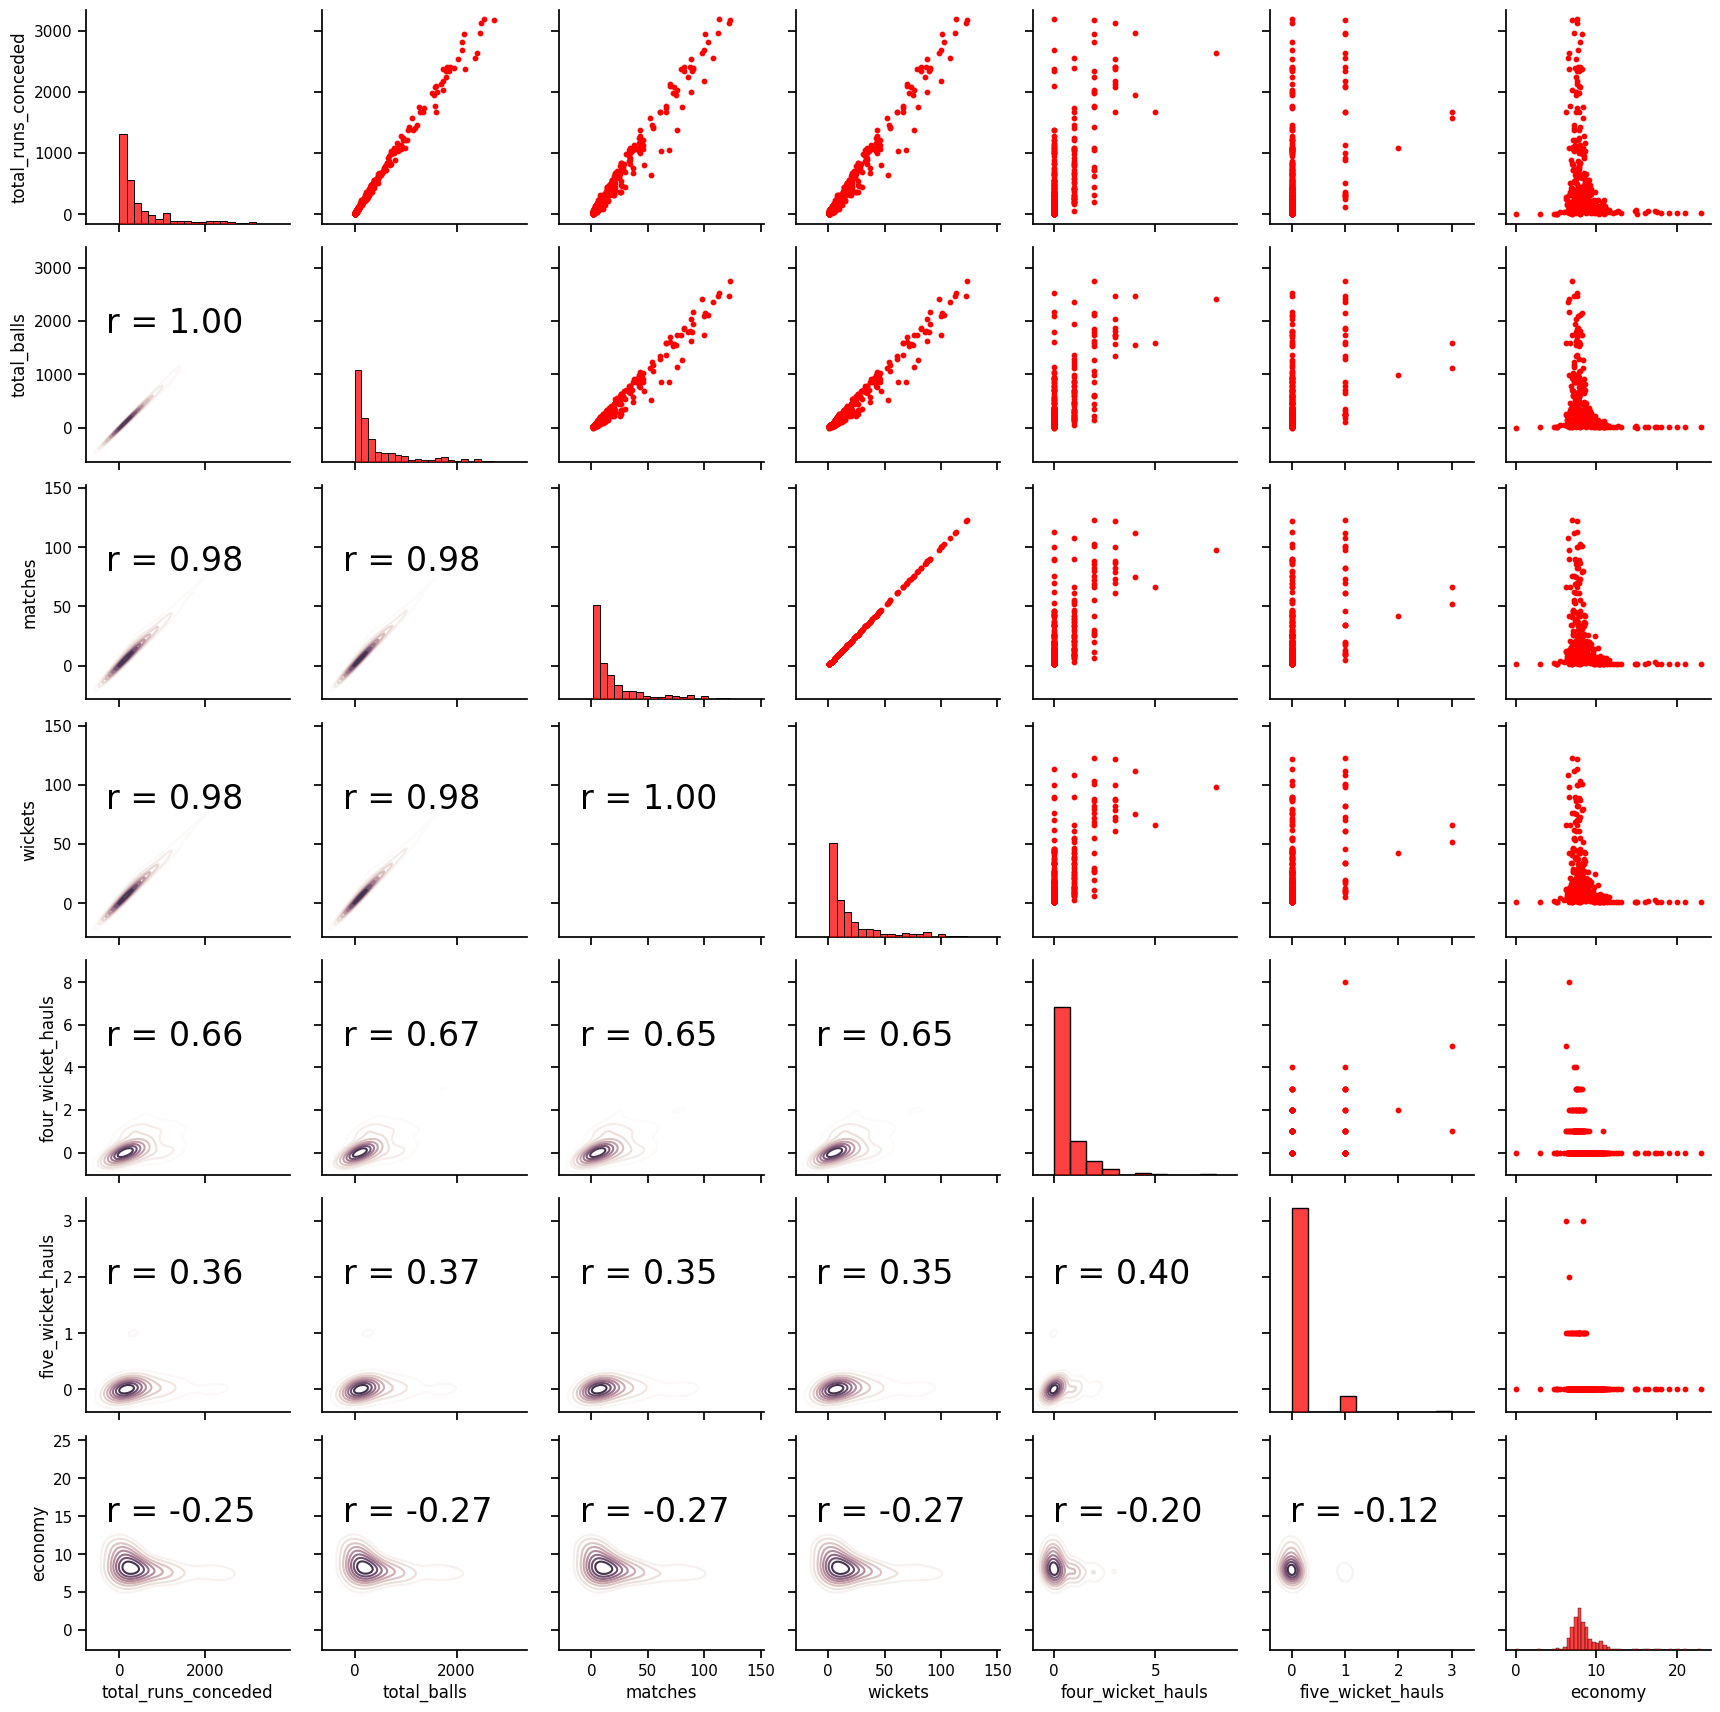

In [59]:
from scipy import stats
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(bowler_matches)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.histplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

### Summary
- **Total Runs vs. Total Balls** (r = 1.00):
  - There is a **perfect positive correlation** between the total number of runs conceded by a bowler and the total number of balls bowled. This implies a direct and proportional relationship where more deliveries equate to more runs conceded.

- **Matches vs. Wickets** and **Total Balls vs. Wickets** (r = 0.98):
  - These exhibit an **extremely high positive correlation**. The more matches a bowler plays and the more balls they bowl, the greater the number of wickets they are likely to take.

- **Four-Wicket Hauls** (r = 0.65-0.67):
  - A **moderate positive correlation** is observed with the total number of balls bowled, matches played, and total wickets taken. This suggests that these factors can be indicative of a bowler's likelihood to achieve four-wicket hauls in a match.

- **Economy Rate** (r = -0.12 to -0.27):
  - There is a **weak negative correlation** between the economy rate and other metrics such as total balls bowled, matches played, and wickets taken. This indicates that a lower economy rate, which is desirable for a bowler, is not strongly influenced by these factors.



# Statistical Modelling

# Go-to bowler for wicket

![Optional Title](https://files.prokerala.com/news/photos/imgs/1024/dc-batter-axar-patel-and-gt-bowler-rashid-khan-1559349.jpg)

### Hypothesis
The hypothesis aims to identify the IPL's go-to bowler through a single hierarchy model that assesses performance metrics, particularly focusing on wicket counts. The goal is to pinpoint the bowler who consistently excels in various matches, making them the top choice for taking wickets.

### Approach
1. Data Preprocessing:
Cleaned the dataset to handle any missing or inconsistent values. Calculated additional derived metrics if needed, such as average balls bowled per match.

3. Define Model Structure:
Defined the hyperpriors for the parameters omega and kappa_minus2. Omega represents the overall success rate of taking wickets, and kappa_minus2 shapes the distribution around omega.
Kappa is derived from kappa_minus2 and represents the concentration of the distribution around omega.

4. Modeling Individual Player Performance:
The model parameter theta is defined as a Beta distribution with alpha and beta parameters that depend on omega, kappa, and the shape of the dataset (total_bowler, representing the number of bowlers). Each bowler has their own theta parameter representing their wicket-taking ability, modeled hierarchically based on the overall success rate (omega) and concentration (kappa).

5. Data Model:
The observed data is modeled using a Binomial distribution (y) with parameters n (total balls bowled) and p (success probability, represented by theta) to predict the number of wickets taken by each bowler based on the total balls bowled.

6. Inference and Analysis:
After defining the model structure, Bayesian inference techniques can be applied to estimate the posterior distributions of model parameters (omega, kappa, theta) given the observed data (wickets taken and total balls bowled).
Posterior distributions provide insights into the uncertainty of parameter estimates and can be used to make predictions, rank bowlers based on their wicket-taking abilities, and assess the impact of different factors (such as total balls bowled) on wicket-taking performance.


### Model Used
The Single Heirarchy Model allows for a comparative analysis among playes using different performance factors to help in determining a bowler's effectiveness as a go-to option.
By analyzing the participation metrics (total balls bowled, wickets taken), this model can identify bowlers who consistently contribute to their team's performance by bowling a significant number of overs across multiple matches.

In [119]:
new_data =bowler_matches[bowler_matches['total_balls']>500]
# new_data.head()
total_bowler=len(new_data)

In [120]:
with pm.Model() as cricket_model:
    # hyperpriors
    omega = pm.Beta('omega', 1., 1.)
    kappa_minus2 = pm.Gamma('kappa_minus2', 0.01, 0.01)
    kappa = pm.Deterministic('kappa', kappa_minus2 + 2)
    
    # our model parameter is modeled itself with hyperpriors, a different one for every player (shape=num_players)
    theta = pm.Beta('theta', alpha=omega*(kappa-2)+1, beta=(1-omega)*(kappa-2)+1, shape=total_bowler)
    
    # our data model
    y = pm.Binomial('y', n=new_data['total_balls'], p=theta, observed=new_data['wickets'])

In [24]:
with cricket_model:
    cricket_model_trace = pm.sample(cores=1)

C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta, kappa_minus2, omega]


C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\theano\scalar\basic.py:2851: RuntimeWarning: divide by zero encountered in true_divide
  return np.float32(1.0) / x
C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1702 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<Axes: >

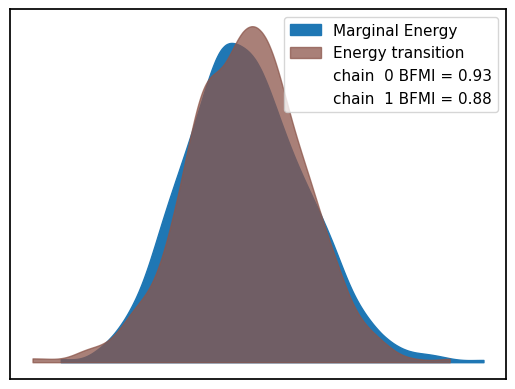

In [28]:
az.plot_energy(cricket_model_trace)

In [30]:
df_reset = new_data.reset_index(drop=True)

df_reset.tail(20)

,total_runs_conceded,total_balls,matches,wickets,four_wicket_hauls,five_wicket_hauls,economy
64,1221,947,44,44,0,0,7.736008
65,1422,1069,55,55,2,0,7.981291
66,1031,852,62,62,0,0,7.260563
67,1944,1557,75,75,4,0,7.491329
68,1465,1223,54,54,1,0,7.187244
69,2646,2407,98,98,8,1,6.595762
70,1673,1594,66,66,5,3,6.297365
71,2244,1796,86,86,2,0,7.496659
72,636,517,53,53,0,0,7.381044
73,668,534,21,21,1,0,7.505618


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

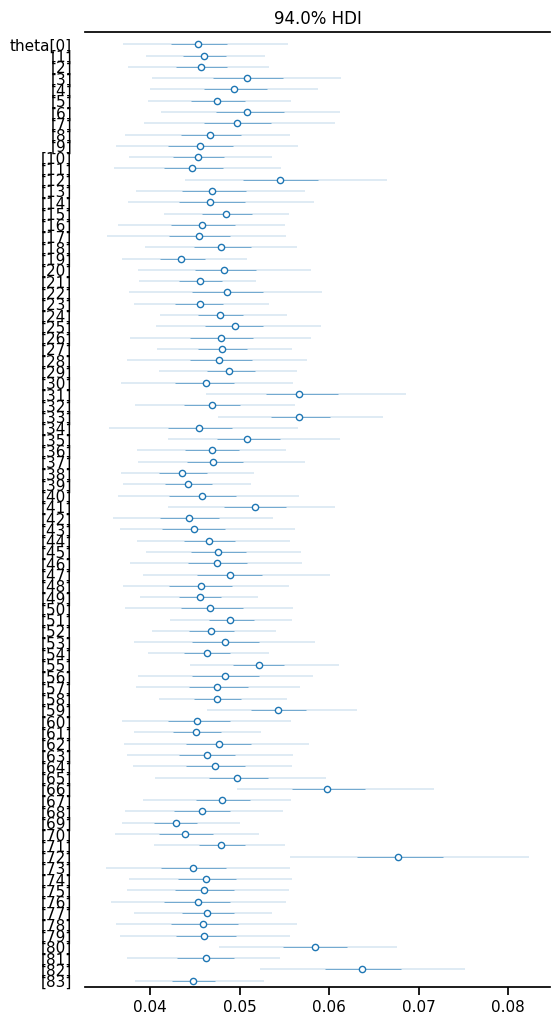

In [31]:
az.plot_forest(cricket_model_trace, var_names=['theta'], combined=True, linewidth=0.2)


### Conclusion
Our Bayesian hierarchical model analysis of IPL bowlers has effectively identified key players with a high probability of taking wickets, as reflected in their individual performance metric, theta. The distribution of these metrics suggests which bowlers are most reliable in crucial wicket-taking scenarios. The results affirm that certain bowlers consistently perform above average, marking them as pivotal assets to their teams. Through this model, we can appreciate both individual skill and the influence of match context on performance. These insights are crucial for strategic decision-making in player selection and game planning.

# Model for team performance based on toss win, toss decision, venue etc.

### Hypothesis
To predict the outcome of IPL matches based on various factors such as team performance, toss result, toss decision, and venue. The model assumes that these factors influence the probability of a team winning a match.

### Approach
1. Data Preprocessing:
Categorical variables like team names, toss winner, toss decision, and venue are encoded into numerical values for modeling purposes.
The outcome variable is encoded as a binary variable (0 or 1) indicating whether the team 1 wins the match.

2. Model Structure:
The model starts by defining hyperparameters for team performance, assuming a normal distribution with mean (team_performance_mu) and standard deviation (team_performance_sigma).
Team performance parameters are sampled from the normal distribution to capture the inherent strength of each team.
Model parameters (alpha, beta_team1, beta_team2, beta_toss, beta_toss_decision) are defined as normal distributions to capture the impact of team 1, team 2, toss winner, and toss decision on the match outcome.
The model equation combines these parameters to calculate a theta value representing the log-odds of team 1 winning the match.

3. Likelihood and Inference:
The likelihood is modeled using a Bernoulli distribution with the sigmoid of theta as the success probability, representing the probability of team 1 winning the match.
Bayesian inference techniques, specifically Markov Chain Monte Carlo (MCMC), are used to sample from the posterior distribution and estimate the model parameters based on the observed match outcomes.

### Why this Model
The model considers multiple factors such as team strength, toss result, toss decision, and venue, which are known to influence match outcomes in cricket.
By using a Bayesian framework, the model provides not only point estimates but also uncertainty estimates for the model parameters, allowing for a more comprehensive analysis of match predictions.

In [5]:
import pymc3 as pm
import pandas as pd
import theano.tensor as tt

# Load the dataset
matches_df = pd.read_csv("data/matches.csv")

# Preprocess data: encode categorical variables
matches_df['team1_encoded'] = pd.Categorical(matches_df['team1']).codes
matches_df['team2_encoded'] = pd.Categorical(matches_df['team2']).codes
matches_df['toss_winner_encoded'] = pd.Categorical(matches_df['toss_winner']).codes
matches_df['toss_decision_encoded'] = pd.Categorical(matches_df['toss_decision']).codes
winner_encoded = (matches_df['winner'] == matches_df['team1']).astype(int)  # Assuming 'winner' is correctly named in your dataset

# Convert data to Theano tensors
team1_tensor = tt.as_tensor_variable(matches_df['team1_encoded'].values)
team2_tensor = tt.as_tensor_variable(matches_df['team2_encoded'].values)
toss_winner_tensor = tt.as_tensor_variable(matches_df['toss_winner_encoded'].values)
toss_decision_tensor = tt.as_tensor_variable(matches_df['toss_decision_encoded'].values)
outcome_tensor = tt.as_tensor_variable(winner_encoded.values)

# Define Bayesian hierarchical model
with pm.Model() as cricket_model:
    # Hyperparameters
    team_performance_mu = pm.Normal('team_performance_mu', mu=0, sigma=10)
    team_performance_sigma = pm.HalfNormal('team_performance_sigma', sigma=10)
    
    # Team performance parameters
    n_teams = matches_df['team1'].nunique()  # Assuming team1 and team2 have the same unique values
    team_performance = pm.Normal('team_performance', mu=team_performance_mu, sigma=team_performance_sigma, shape=n_teams)
    
    # Model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta_team1 = pm.Normal('beta_team1', mu=0, sigma=10)
    beta_team2 = pm.Normal('beta_team2', mu=0, sigma=10)
    beta_toss = pm.Normal('beta_toss', mu=0, sigma=10)
    beta_toss_decision = pm.Normal('beta_toss_decision', mu=0, sigma=10)
    
    # Model equation
    theta = (alpha + 
             beta_team1 * team1_tensor + 
             beta_team2 * team2_tensor + 
             beta_toss * toss_winner_tensor + 
             beta_toss_decision * toss_decision_tensor + 
             team_performance[team1_tensor] - 
             team_performance[team2_tensor])
    
    # Likelihood
    outcome = pm.Bernoulli('outcome', p=pm.math.sigmoid(theta), observed=outcome_tensor)
    
    # Sample from the posterior distribution
    trace = pm.sample(500, tune=500, cores=1, target_accept=0.95)

# Analyze the results
summary = pm.summary(trace)
print(summary)


C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Sequential sampling (2 chains in 1 job)
NUTS: [beta_toss_decision, beta_toss, beta_team2, beta_team1, alpha, team_performance, team_performance_sigma, team_performance_mu]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 52840 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


                         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
team_performance_mu     0.624  9.426 -16.057   18.363      0.889    0.631   
team_performance[0]     0.949  9.419 -16.144   18.452      0.889    0.630   
team_performance[1]     0.364  9.430 -16.546   18.131      0.888    0.630   
team_performance[2]     0.813  9.425 -16.416   18.373      0.888    0.630   
team_performance[3]     0.433  9.420 -16.512   18.018      0.888    0.629   
team_performance[4]     0.520  9.443 -16.244   18.438      0.890    0.631   
team_performance[5]     0.579  9.423 -16.255   18.262      0.890    0.631   
team_performance[6]     0.548  9.420 -16.271   18.153      0.887    0.629   
team_performance[7]     0.722  9.424 -16.150   18.295      0.889    0.630   
team_performance[8]     0.962  9.418 -15.766   18.715      0.890    0.631   
team_performance[9]     0.158  9.431 -16.848   17.693      0.889    0.630   
team_performance[10]    0.741  9.426 -16.144   18.369      0.889    0.630   

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<Axes: title={'center': 'team_performance_mu'}>,
        <Axes: title={'center': 'team_performance_mu'}>],
       [<Axes: title={'center': 'team_performance'}>,
        <Axes: title={'center': 'team_performance'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta_team1'}>,
        <Axes: title={'center': 'beta_team1'}>],
       [<Axes: title={'center': 'beta_team2'}>,
        <Axes: title={'center': 'beta_team2'}>],
       [<Axes: title={'center': 'beta_toss'}>,
        <Axes: title={'center': 'beta_toss'}>],
       [<Axes: title={'center': 'beta_toss_decision'}>,
        <Axes: title={'center': 'beta_toss_decision'}>],
       [<Axes: title={'center': 'team_performance_sigma'}>,
        <Axes: title={'center': 'team_performance_sigma'}>]], dtype=object)

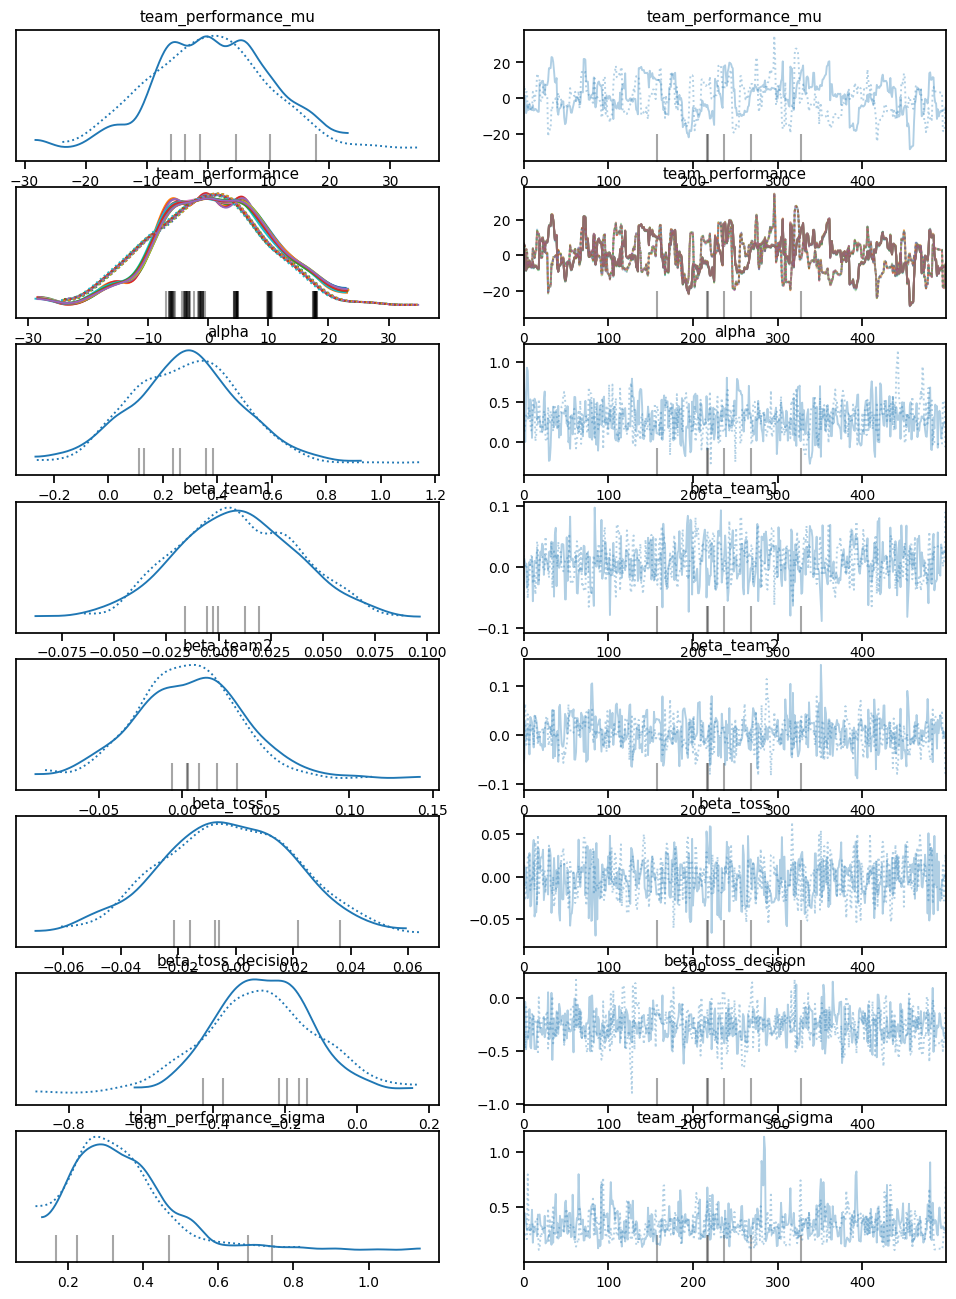

In [6]:
az.plot_trace(trace)

In [7]:
az.summary(trace, round_to=2)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
team_performance_mu,0.62,9.43,-16.06,18.36,0.89,0.63,112.54,226.57,1.01
team_performance[0],0.95,9.42,-16.14,18.45,0.89,0.63,112.55,230.36,1.01
team_performance[1],0.36,9.43,-16.55,18.13,0.89,0.63,112.70,234.03,1.01
team_performance[2],0.81,9.42,-16.42,18.37,0.89,0.63,112.63,221.82,1.01
team_performance[3],0.43,9.42,-16.51,18.02,0.89,0.63,112.77,218.73,1.01
team_performance[4],0.52,9.44,-16.24,18.44,0.89,0.63,112.76,226.57,1.01
team_performance[5],0.58,9.42,-16.25,18.26,0.89,0.63,112.08,226.57,1.01
team_performance[6],0.55,9.42,-16.27,18.15,0.89,0.63,112.84,226.57,1.01
team_performance[7],0.72,9.42,-16.15,18.30,0.89,0.63,112.54,226.57,1.01
team_performance[8],0.96,9.42,-15.77,18.72,0.89,0.63,111.76,226.57,1.01


## Conclusion
The Bayesian model offers insights into the factors affecting IPL match outcomes, indicating:

    Team Performance: Average team strength (team_performance_mu) shows no strong bias, but high variability suggests uncertainty in team advantage estimates.

    Influence of Toss: Toss decisions (beta_toss_decision) appear to impact match results, with a noticeable negative influence on the probability of a team winning.

    Team-Specific Variation: Teams exhibit distinct performance levels, although the estimates come with considerable uncertainty.

    Uncertainty in Estimates: Convergence in trace plots is evident for some parameters, while others may benefit from additional sampling to reduce autocorrelation and improve robustness.

Overall, the model underscores the subtle yet present effects of strategic decisions and individual team strengths on match outcomes.

# Model to compare how morale affects bowlers

### Hypothesis
The hypothesis is to predict the wickets taken by bowlers in IPL matches based on their bowling team's performance. We assume that the wickets taken by bowlers are influenced by the overall team performance

### Approach
1. Data Preparation:
Match-level aggregates are calculated for each bowler, summarizing their performance across matches.

2. Hierarchical Structure:
The model incorporates a double hierarchical structure to capture the variability in bowler performance within and across bowling teams.
Hyper-hyperpriors omega and kappa_minus2 are defined to model the overall distribution of team performance.
Hyperpriors omega_c and kappa_c_minus2 are defined for each bowling team, representing the team-specific performance distribution.

3. Bayesian Inference:
Bayesian inference techniques, specifically Markov Chain Monte Carlo (MCMC), are used to sample from the posterior distribution of model parameters and estimate the wicket-taking probabilities for each bowler based on the observed data.

### Why this Model
The model captures the hierarchical nature of bowler performance within teams and across teams, accounting for the influence of team performance on individual bowler performance.
By incorporating hyper-hyperpriors and hyperpriors, the model provides a structured framework for understanding the variability in wicket-taking performances.
Bayesian hierarchical modeling accommodates complex data structures and dependencies, making it suitable for analyzing cricket performance data with multiple levels of hierarchy.


### Data preparation

In [48]:
# Calculate innings metrics for bowlers
bowler_grouped = ipl_data.groupby(['bowling_team','bowler', 'match_id']).agg(
    runs_conceded=pd.NamedAgg(column='total_runs', aggfunc='sum'),
    balls=pd.NamedAgg(column='ball', aggfunc='count'),
    wickets=pd.NamedAgg(column='dismissal_kind', aggfunc=lambda x: x.notna().sum()),  # assuming all kinds of dismissals
    four_wickets=pd.NamedAgg(column='dismissal_kind', aggfunc=lambda x: (x.notna().sum() >= 4) and (x.notna().sum() < 5)),
    five_wickets=pd.NamedAgg(column='dismissal_kind', aggfunc=lambda x: (x.notna().sum() >= 5))
)

# Calculate match-level aggregates
bowler_matches = bowler_grouped.groupby(['bowling_team','bowler']).agg(
    total_runs_conceded=pd.NamedAgg(column='runs_conceded', aggfunc='sum'),
    total_balls=pd.NamedAgg(column='balls', aggfunc='sum'),
    matches=pd.NamedAgg(column='runs_conceded', aggfunc='size'),
    wickets=pd.NamedAgg(column='wickets', aggfunc=lambda x: x.notna().sum()),
    four_wicket_hauls=pd.NamedAgg(column='four_wickets', aggfunc='sum'),
    five_wicket_hauls=pd.NamedAgg(column='five_wickets', aggfunc='sum')
)

# Calculate bowling strike rate and economy
bowler_matches['economy'] = (bowler_matches['total_runs_conceded'] / bowler_matches['total_balls']) * 6  # Runs per over

bowler_grouped.head(100)

runs_conceded  balls  wickets  \
bowling_team        bowler     match_id                                  
Chennai Super Kings A Flintoff 59                   45     24        1   
                               63                   11     18        1   
                               66                   50     24        0   
                    A Nehra    401                  24     18        1   
                               451                  34     25        3   
...                                                ...    ...      ...   
                    DJ Bravo   245                  29     21        1   
                               248                  16     12        1   
                               249                  16     19        1   
                               254                  10      6        0   
                               259                   5      6        0   

                                         four_wickets  five_wickets  
bowling_team        bowler     match_id                              
Chennai Super Kings A Flintoff 59               False         False  
                               63               False         False  
                               66               False         False  
                    A Nehra    401              False         False  
                               451              False         False  
...                                               ...           ...  
                    DJ Bravo   245              False         False  
                               248              False         False  
                               249              False         False  
                               254              False         False  
                               259              False         False  

[100 rows x 5 columns]

In [49]:
data=bowler_matches.reset_index()
data

,bowling_team,bowler,total_runs_conceded,total_balls,matches,wickets,four_wicket_hauls,five_wicket_hauls,economy
0,Chennai Super Kings,A Flintoff,106,66,3,3,0,0,9.636364
1,Chennai Super Kings,A Nehra,596,478,20,20,2,0,7.481172
2,Chennai Super Kings,AS Rajpoot,37,25,2,2,0,0,8.880000
3,Chennai Super Kings,B Laughlin,72,45,2,2,0,0,9.600000
4,Chennai Super Kings,BW Hilfenhaus,497,390,17,17,0,0,7.646154
...,...,...,...,...,...,...,...,...,...
547,Sunrisers Hyderabad,Parvez Rasool,114,86,5,5,0,0,7.953488
548,Sunrisers Hyderabad,RS Bopara,164,123,7,7,0,0,8.000000
549,Sunrisers Hyderabad,TA Boult,278,207,8,8,0,0,8.057971
550,Sunrisers Hyderabad,Y Venugopal Rao,16,12,2,2,0,0,8.000000


In [50]:
data.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                  'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                  'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                 ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)
data['bowling_team'].unique()

array(['CSK', 'DC', 'DD', 'GL', 'KXIP', 'KTK', 'KKR', 'MI', 'PW', 'RR',
       'RPS', 'RCB', 'SRH'], dtype=object)

In [51]:
num_team = data['bowling_team'].nunique()
team_idx = data['bowling_team']
num_players = data['bowler'].nunique()
player_idx = data['bowler']

num_team

13

In [52]:
team_idx

0      CSK
1      CSK
2      CSK
3      CSK
4      CSK
      ... 
547    SRH
548    SRH
549    SRH
550    SRH
551    SRH
Name: bowling_team, Length: 552, dtype: object

In [53]:
data['team_encoded'] = pd.Categorical(data['bowling_team']).codes
data

,bowling_team,bowler,total_runs_conceded,total_balls,matches,wickets,four_wicket_hauls,five_wicket_hauls,economy,team_encoded
0,CSK,A Flintoff,106,66,3,3,0,0,9.636364,0
1,CSK,A Nehra,596,478,20,20,2,0,7.481172,0
2,CSK,AS Rajpoot,37,25,2,2,0,0,8.880000,0
3,CSK,B Laughlin,72,45,2,2,0,0,9.600000,0
4,CSK,BW Hilfenhaus,497,390,17,17,0,0,7.646154,0
...,...,...,...,...,...,...,...,...,...,...
547,SRH,Parvez Rasool,114,86,5,5,0,0,7.953488,12
548,SRH,RS Bopara,164,123,7,7,0,0,8.000000,12
549,SRH,TA Boult,278,207,8,8,0,0,8.057971,12
550,SRH,Y Venugopal Rao,16,12,2,2,0,0,8.000000,12


In [54]:
### position_idx2 = data['bowling_team'] - 1
data['bowling_team'].unique()

array(['CSK', 'DC', 'DD', 'GL', 'KXIP', 'KTK', 'KKR', 'MI', 'PW', 'RR',
       'RPS', 'RCB', 'SRH'], dtype=object)

In [55]:
new_data = data

In [56]:
num_players =len(new_data)
team_encoded = new_data['team_encoded']

In [57]:
with pm.Model() as double_hierarchy_model:
    # hyper-hyperpriors
    omega = pm.Beta('omega', 1., 1.)
    kappa_minus2 = pm.Gamma('kappa_minus2', 0.01, 0.01)
    kappa = pm.Deterministic('kappa', kappa_minus2 + 2)

    # Parameters for positions (hyperpriors)
    omega_c = pm.Beta('omega_c',
                       omega*(kappa-2)+1, (1-omega)*(kappa-2)+1,
                       shape = num_team)    
    kappa_c_minus2 = pm.Gamma('kappa_c_minus2',
                              0.01, 0.01,
                              shape = num_team)
    kappa_c = pm.Deterministic('kappa_c', kappa_c_minus2 + 2)
    
    # Parameters for players (priors)
    #theta = pm.Beta('theta', alpha=omega*(kappa-2)+1, beta=(1-omega)*(kappa-2)+1, shape=num_players)
    theta = pm.Beta('theta',
                     omega_c[team_encoded]*(kappa_c[team_encoded]-2)+1,
                    (1-omega_c[team_encoded])*(kappa_c[team_encoded]-2)+1,
                     shape = num_players)
    
    y = pm.Binomial('y', n=new_data['total_balls'], p=theta, observed=new_data['wickets'])

In [64]:
with double_hierarchy_model:
    double_hierarchy_trace = pm.sample(cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta, kappa_c_minus2, omega_c, kappa_minus2, omega]


C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\theano\scalar\basic.py:2851: RuntimeWarning: divide by zero encountered in true_divide
  return np.float32(1.0) / x
C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 19494 seconds.
The number of effective samples is smaller than 25% for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\lenovo\anaconda3\envs\myenv\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<Axes: >

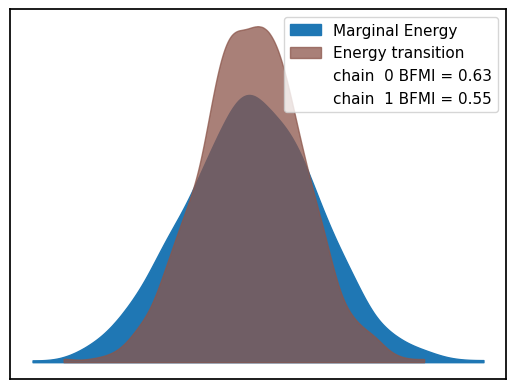

In [65]:
az.plot_energy(double_hierarchy_trace)

Got error No model on context stack. trying to find log_likelihood in translation.


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

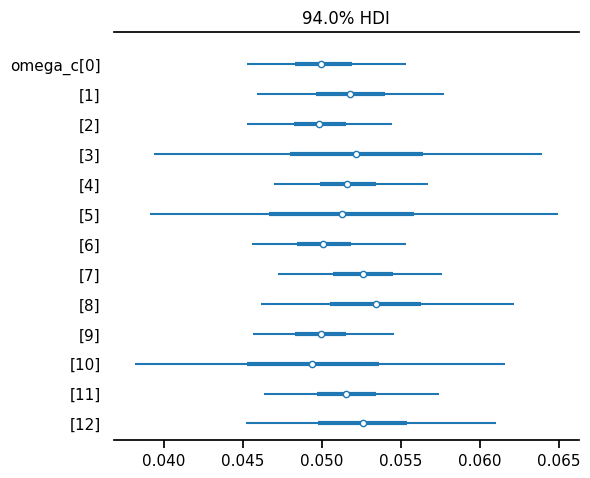

In [66]:
az.plot_forest(double_hierarchy_trace, var_names=['omega_c'], combined=True)

### Conclusion
The double hierarchical model applied to IPL bowling data reveals significant insights into individual and team performances. 
The posterior distributions obtained from MCMC sampling suggest that while some bowlers exhibit high individual wicket-taking probabilities (theta), these probabilities are also influenced by their respective team's overall performance (omega_c).
The energy plot suggests that the MCMC sampling process was reasonably efficient, although the BFMI values indicate there might be room for optimization in the sampling strategy. Nonetheless, the model provides a structured understanding of the variability in bowler performances and offers a framework for evaluating how team conditions affect individual outcomes.